In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
import matplotlib.tri as mtri

#### Matrix rotation for semilandmarks

In [2]:
angle = -90.
theta = angle * np.pi/180.

rot_mat = np.array([[np.cos(theta), - np.sin(theta)],
                   [np.sin(theta), np.cos(theta)]])

def rotate_semilandmarks(edge_array, angle, theta, rot_mat):
    rotated = list()
    for edge in edge_array:
        rotated.append(np.dot(rot_mat, edge))
    edge_array = np.array(rotated)
    edge_array[:, 1] = edge_array[:, 1]*-1
    
    return edge_array
    

#### Generate triangulation to be able to save stl format

In [4]:
from stl import mesh
import scipy.spatial

def get_triangulation(R, Phi, X, Y, Z, filename):
    
    tri = mtri.Triangulation(X.flatten(), Y.flatten())
    triangles_masked = tri.get_masked_triangles()
    data = np.zeros(len(triangles_masked), dtype=mesh.Mesh.dtype)
    tri_mesh = mesh.Mesh(data, remove_empty_areas=False)
    triangles_masked = tri.get_masked_triangles()
    tri_mesh.x[:] = X.flatten()[triangles_masked]
    tri_mesh.y[:] = Y.flatten()[triangles_masked]
    tri_mesh.z[:] = Z[triangles_masked]
    tri_mesh.save('output/stl/%s.stl' %(os.path.splitext(filename)[0]))
    
    return tri_mesh

#### Plot surface func

In [8]:
def plot_vessel(edge_array, X, Y, Z, index_name):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax2 = fig.add_axes([0.05,0.7,0.15,.2])
    ax2.plot(edge_array[:,0], edge_array[:,1], color="k")
    ax2.set_aspect('equal', 'datalim')
    plt.gca().invert_yaxis()
    #surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.8)
    surf = ax.plot_wireframe(X, Y,Z)
    #surf = ax.plot_trisurf(X.ravel(), Y.ravel(), Z.ravel())
    ax.invert_zaxis()

    plt.savefig('output/revol/revol_{}.png'.format(os.path.splitext(index_name)[0]))
    
    return plt.show()

#### Spin edge with 100 semilandmarks

In [9]:
% matplotlib inline
plt.style.use('ggplot')

def spin_border(semilandmarks_file='data/input_morphoJ.csv', generate_stl=False):
    df = pd.read_csv(semilandmarks_file, sep=',')
    ids = df['id']
    df = df.drop(['id'], axis=1)
    for index, row in df.iterrows():
        edge_array = row.reshape(100, 2)
        # rotation of landmarks
        edge_array = rotate_semilandmarks(edge_array, angle, theta, rot_mat)
        r = edge_array[:, 0]
        # angular component is one revolution of 60 steps
        phi = np.linspace(0, 2*np.pi, 60) #10
        R,Phi = np.meshgrid(r, phi)

        X = R*np.cos(Phi)
        Y = R*np.sin(Phi)
        Z = np.tile(edge_array[:,1], len(Y)).reshape(Y.shape)
        z = np.tile(edge_array[:,1], len(Y))
        print(ids[index])
        if generate_stl:
            tri = get_triangulation(R, Phi, X, Y, z, ids[index])
        
        vessel = plot_vessel(edge_array, X, Y, Z, ids[index])
        
        if index == 10:
            break
    

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if __name__ == '__main__':


AL_03A.png


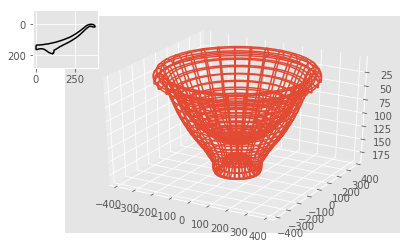

AL_03B.png


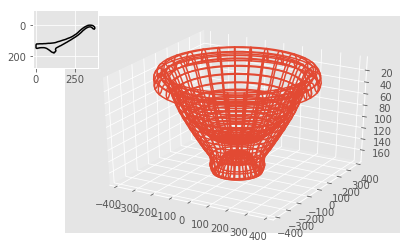

AL_03C.png


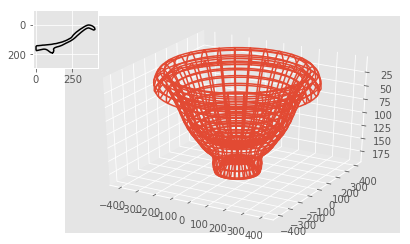

AL_03D.png


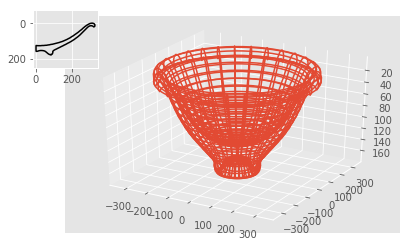

AL_03E.png


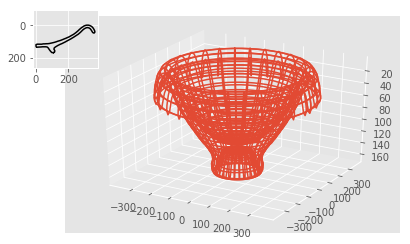

AL_03F.png


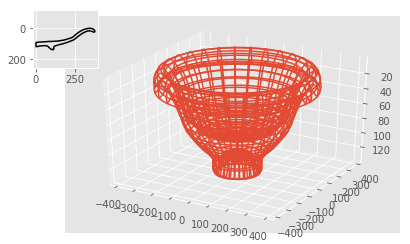

AL_03H.png


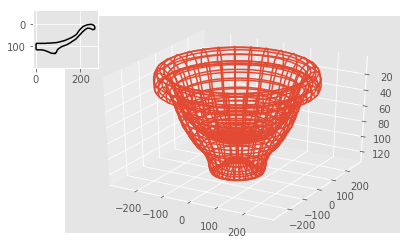

AL_03I.png


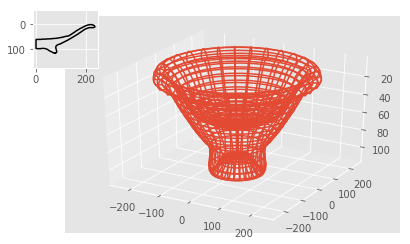

AL_03J.png


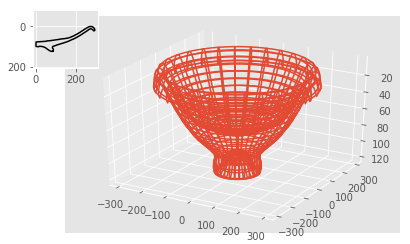

AL_03K.png


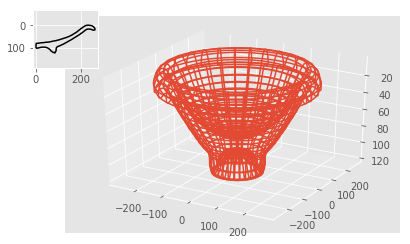

AL_03L.png


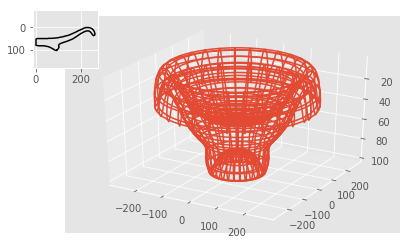

In [10]:
spin_border(generate_stl=True)

#### View of .stl file in cura

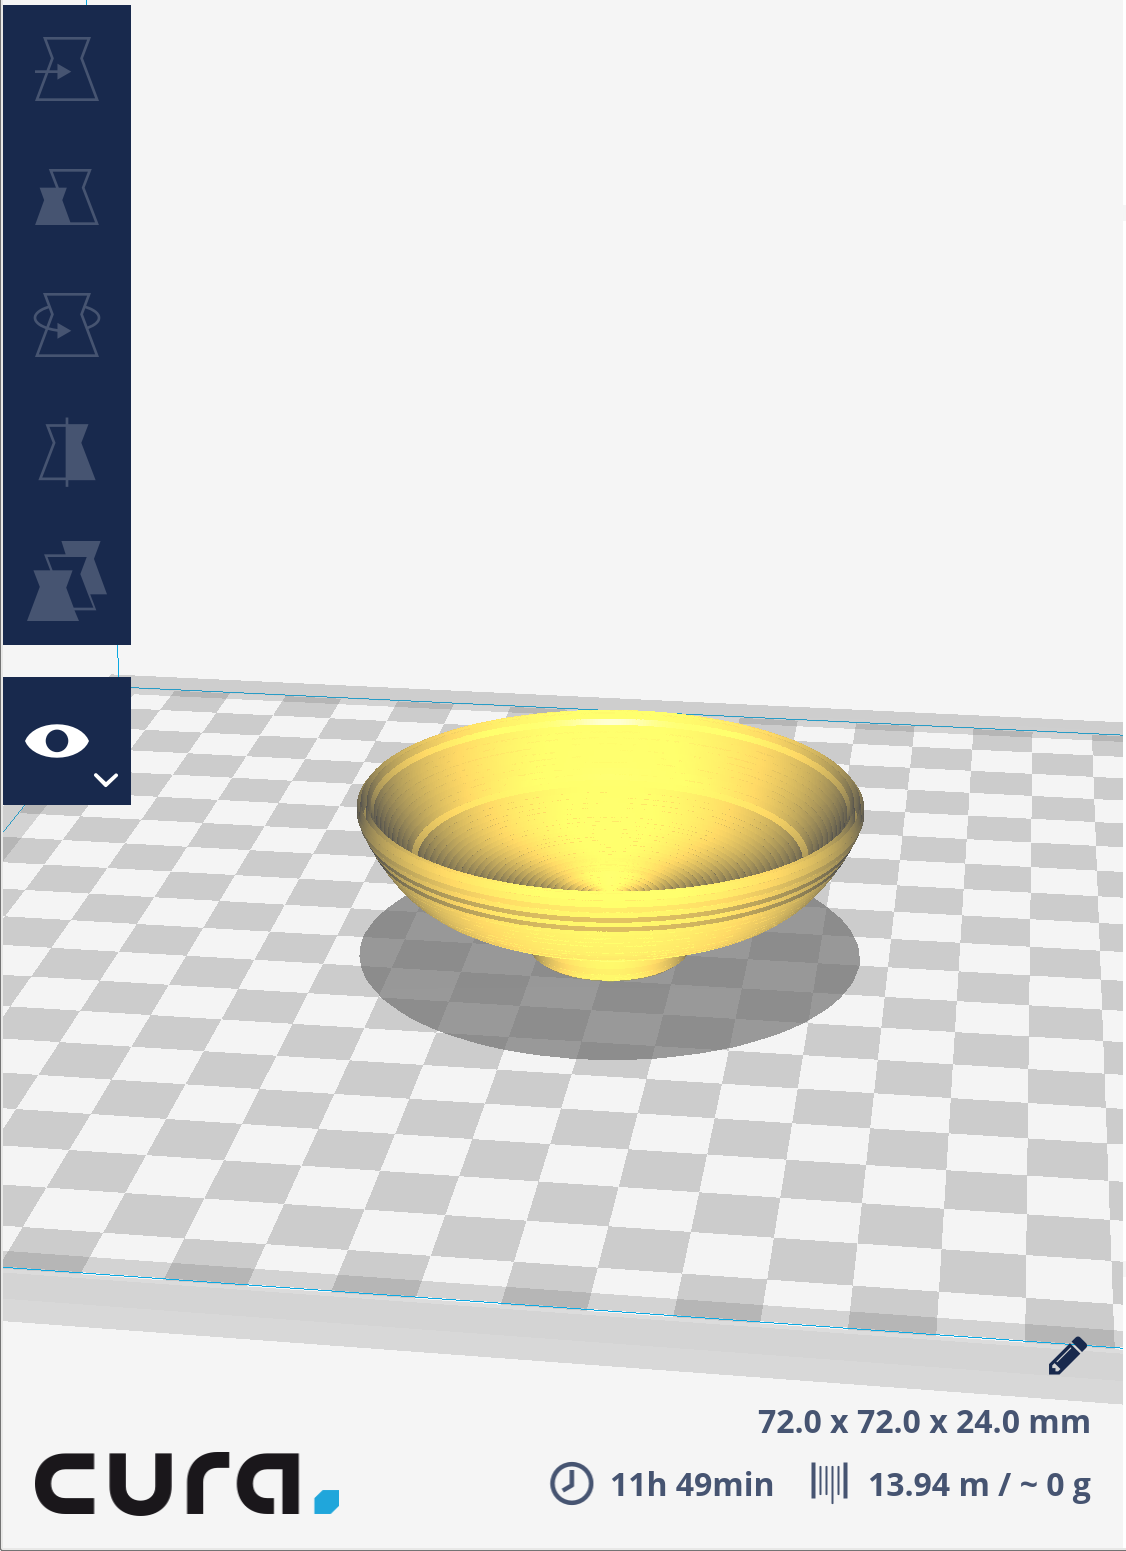

In [13]:
from IPython.display import Image
Image('cura_test.png')

In [ ]:
import plotly.plotly as py
from plotly.graph_objs import Surface, Data, \
                              Layout, Scene, \
                              XAxis, YAxis, \
                              ZAxis, Figure

surface = Surface(x=X, y=Y, z=Z)
data = Data([surface])

layout = Layout(
    title='plotly vassels',
    scene=Scene(
        xaxis=XAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        yaxis=YAxis(
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        ),
        zaxis=ZAxis(
            autorange='reversed',
            gridcolor='rgb(255, 255, 255)',
            zerolinecolor='rgb(255, 255, 255)',
            showbackground=True,
            backgroundcolor='rgb(230, 230,230)'
        )
    )
)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='parametric_plot')
